
# Automated Exploratory Data Analysis & Baseline Modeling

**Dataset path:** `/mnt/data/462c5031-1b93-45c4-a0f8-0b0fcc1e499c.csv`  
This notebook runs a full exploratory data analysis (EDA) pipeline and attempts simple baseline models if a target column is detected.

Open and run the cells in order. The notebook includes:
- Data inspection (head, info, summary)
- Missing values analysis
- Data types and unique value summaries
- Visualizations for numeric and categorical features
- Correlation matrix and a simple heatmap
- Automatic target detection (commonly named columns like `target`, `label`, `price`, `SalePrice`, `y`)
- If a target is found: basic train/validation using linear models or random forest (regression/classification)
- Guidance/comments for next steps and feature engineering

**Note:** Some visualizations require a GUI backend to show inline plots — this notebook is ready to run in Jupyter.


In [1]:

# Imports and load

import seaborn as sns
import plotly.express as px
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import display
pd.set_option('display.max_columns', 200)
pd.set_option('display.width', 200)



df = pd.read_csv('Netflix Dataset.csv')
print("Loaded dataframe with shape:", df.shape)
display(df.head())


Loaded dataframe with shape: (7789, 11)


,Show_Id,Category,Title,Director,Cast,Country,Release_Date,Rating,Duration,Type,Description
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...
1,s2,Movie,07:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow..."
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi..."
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",PG-13,123 min,Dramas,A brilliant group of students become card-coun...


In [11]:

# Basic info and summary
print("Info:")
print(df.info())
print("\nNumerical summary:")
num_cols = df.select_dtypes(include=[np.number]).columns.tolist()
for c in num_cols:
    print(f"\nColumn: {c}")
    display(df[c].describe())
print("\nCategorical summary (top unique values):")
cat_cols = df.select_dtypes(include=['object','category']).columns.tolist()
for c in cat_cols:
    print(f"\nColumn: {c} -> {df[c].nunique()} unique values. Top 10:")
    display(df[c].value_counts(dropna=False).head(10))


Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7789 entries, 0 to 7788
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Show_Id       7789 non-null   object
 1   Category      7789 non-null   object
 2   Title         7789 non-null   object
 3   Director      5401 non-null   object
 4   Cast          7071 non-null   object
 5   Country       7282 non-null   object
 6   Release_Date  7779 non-null   object
 7   Rating        7782 non-null   object
 8   Duration      7789 non-null   object
 9   Type          7789 non-null   object
 10  Description   7789 non-null   object
dtypes: object(11)
memory usage: 669.5+ KB
None

Numerical summary:

Categorical summary (top unique values):

Column: Show_Id -> 7787 unique values. Top 10:


Show_Id
s684     2
s6621    2
s7756    1
s27      1
s7772    1
s7771    1
s12      1
s7787    1
s1       1
s2       1
Name: count, dtype: int64


Column: Category -> 2 unique values. Top 10:


Category
Movie      5379
TV Show    2410
Name: count, dtype: int64


Column: Title -> 7787 unique values. Top 10:


Title
Backfire                                   2
The Lost Okoroshi                          2
Z Nation                                   1
(Un)Well                                   1
Zion                                       1
Zinzana                                    1
1983                                       1
ZZ TOP: THAT LITTLE OL' BAND FROM TEXAS    1
3%                                         1
07:19                                      1
Name: count, dtype: int64


Column: Director -> 4050 unique values. Top 10:


Director
NaN                       2388
Raúl Campos, Jan Suter      18
Marcus Raboy                16
Jay Karas                   14
Cathy Garcia-Molina         13
Jay Chapman                 12
Martin Scorsese             12
Youssef Chahine             12
Steven Spielberg            10
David Dhawan                 9
Name: count, dtype: int64


Column: Cast -> 6831 unique values. Top 10:


Cast
NaN                                                                                                                       718
David Attenborough                                                                                                         18
Samuel West                                                                                                                10
Jeff Dunham                                                                                                                 7
Michela Luci, Jamie Watson, Eric Peterson, Anna Claire Bartlam, Nicolas Aqui, Cory Doran, Julie Lemieux, Derek McGrath      6
Kevin Hart                                                                                                                  6
Craig Sechler                                                                                                               6
Iliza Shlesinger                                                                                                 


Column: Country -> 681 unique values. Top 10:


Country
United States     2556
India              923
NaN                507
United Kingdom     397
Japan              226
South Korea        183
Canada             177
Spain              134
France             115
Egypt              101
Name: count, dtype: int64


Column: Release_Date -> 1565 unique values. Top 10:


Release_Date
January 1, 2020      118
November 1, 2019      94
December 31, 2019     76
March 1, 2018         76
October 1, 2018       72
October 1, 2019       63
November 1, 2018      61
July 1, 2019          58
January 1, 2021       53
January 1, 2018       51
Name: count, dtype: int64


Column: Rating -> 14 unique values. Top 10:


Rating
TV-MA    2865
TV-14    1931
TV-PG     806
R         665
PG-13     386
TV-Y      280
TV-Y7     271
PG        247
TV-G      194
NR         84
Name: count, dtype: int64


Column: Duration -> 216 unique values. Top 10:


Duration
1 Season     1608
2 Seasons     382
3 Seasons     184
90 min        136
93 min        131
94 min        126
91 min        125
95 min        119
97 min        118
92 min        118
Name: count, dtype: int64


Column: Type -> 492 unique values. Top 10:


Type
Documentaries                                       334
Stand-Up Comedy                                     321
Dramas, International Movies                        320
Comedies, Dramas, International Movies              243
Dramas, Independent Movies, International Movies    215
Kids' TV                                            205
Children & Family Movies                            177
Documentaries, International Movies                 172
Children & Family Movies, Comedies                  169
Comedies, International Movies                      161
Name: count, dtype: int64


Column: Description -> 7769 unique values. Top 10:


Description
Multiple women report their husbands as missing but when it appears they are looking for the same man, a police officer traces their cryptic connection.    3
A surly septuagenarian gets another chance at her 20s after having her photo snapped at a studio that magically takes 50 years off her life.                3
When pretty new neighbor Seema falls for their shy roommate Sid, jealous womanizers Omi and Jai plot to break up the new lovebirds.                         2
As a woman scours Hyderabad for her missing husband, she becomes entangled in a conspiracy that suggests there’s more to the mystery than meets the eye.    2
As a blind librarian, dispirited cricketer and desolate psychiatrist each seek retribution and release, their lives overlap under eerie influences.         2
A scheming matriarch plots to cut off her disabled stepson and his wife from the family fortune, creating a division within the clan.                       2
When Elastigirl gets recruited for a hig

In [3]:

# Missing value analysis
missing = df.isnull().sum().sort_values(ascending=False)
missing = missing[missing > 0]
if len(missing)==0:
    print("No missing values detected.")
else:
    display(missing.to_frame(name='missing_count'))
    display((missing / len(df)).to_frame(name='missing_fraction'))


,missing_count
Director,2388
Cast,718
Country,507
Release_Date,10
Rating,7


,missing_fraction
Director,0.306586
Cast,0.092181
Country,0.065092
Release_Date,0.001284
Rating,0.000899


In [4]:

# Data types and suggested conversions
dtypes = df.dtypes
display(dtypes.to_frame(name='dtype'))
# Try to parse dates
possible_date_cols = [c for c in df.columns if 'date' in c.lower() or 'time' in c.lower()]
print("Columns that look like dates/times:", possible_date_cols)


,dtype
Show_Id,object
Category,object
Title,object
Director,object
Cast,object
Country,object
Release_Date,object
Rating,object
Duration,object
Type,object


Columns that look like dates/times: ['Release_Date']


In [5]:

# Numeric distributions - histograms and boxplots (will create one figure per numeric column if <= 12)
import math
num_cols = df.select_dtypes(include=[np.number]).columns.tolist()
print("Numeric columns:", num_cols)
if len(num_cols)==0:
    print("No numeric columns to plot.")
else:
    sample_cols = num_cols if len(num_cols) <= 12 else num_cols[:12]
    for col in sample_cols:
        fig, axes = plt.subplots(1,2, figsize=(10,3))
        axes[0].hist(df[col].dropna(), bins=30)
        axes[0].set_title(f"Histogram: {col}")
        axes[1].boxplot(df[col].dropna(), vert=False)
        axes[1].set_title(f"Boxplot: {col}")
        plt.tight_layout()
        plt.show()
    if len(num_cols) > 12:
        print(f"(Shown first 12 of {len(num_cols)} numeric columns)")


Numeric columns: []
No numeric columns to plot.


Categorical columns: ['Show_Id', 'Category', 'Title', 'Director', 'Cast', 'Country', 'Release_Date', 'Rating', 'Duration', 'Type', 'Description']


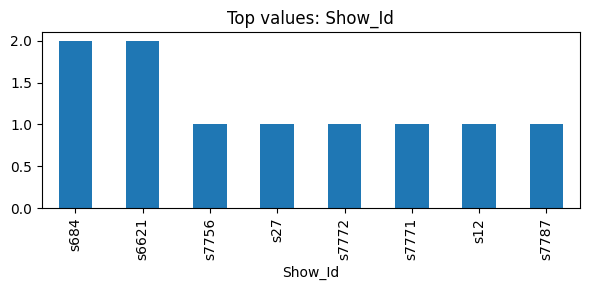

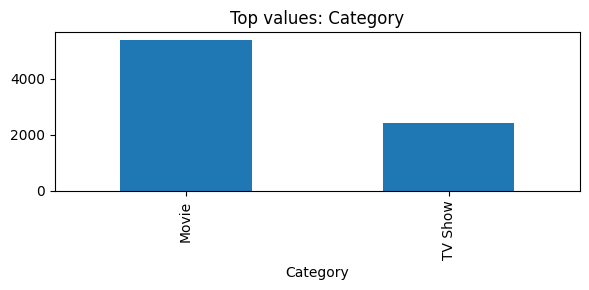

C:\Users\Tushar\AppData\Local\Temp\ipykernel_16868\3670456628.py:9: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


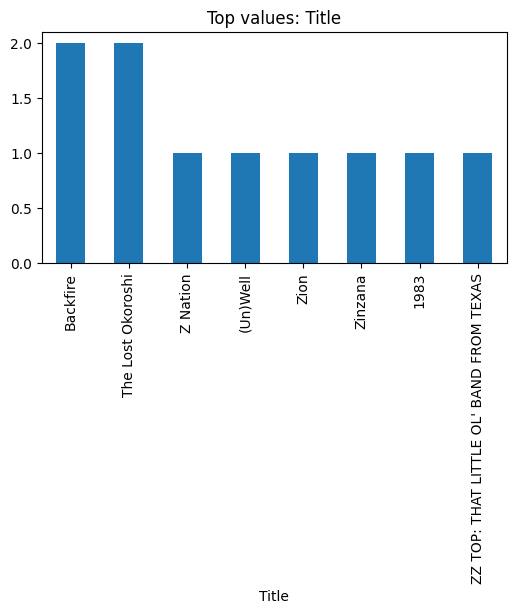

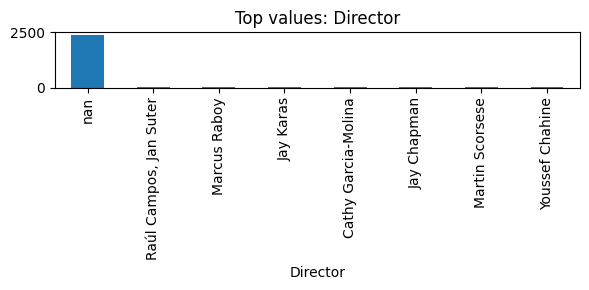

C:\Users\Tushar\AppData\Local\Temp\ipykernel_16868\3670456628.py:9: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


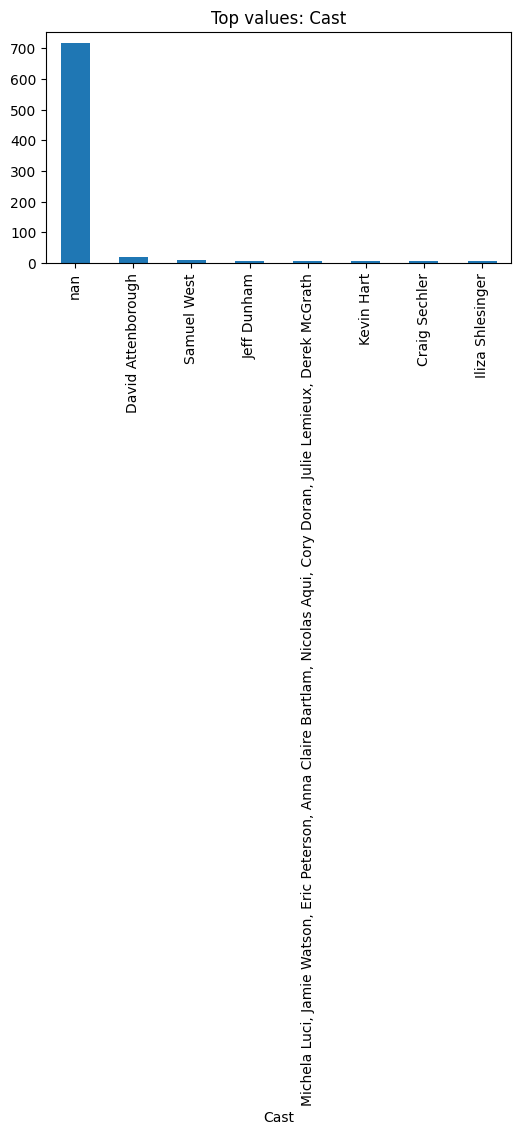

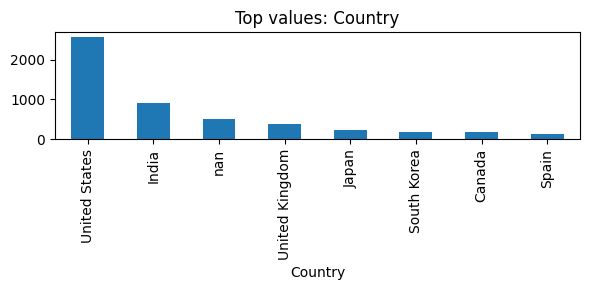

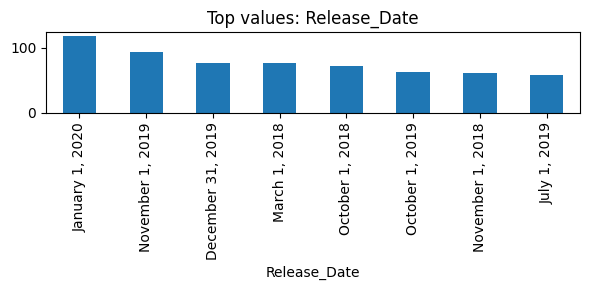

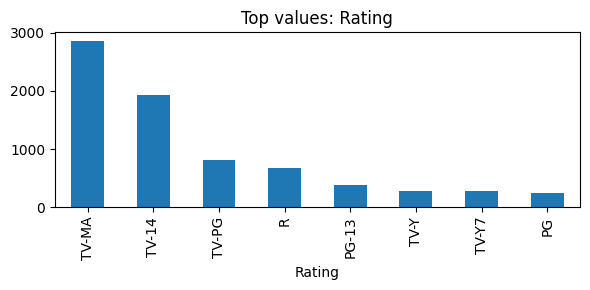

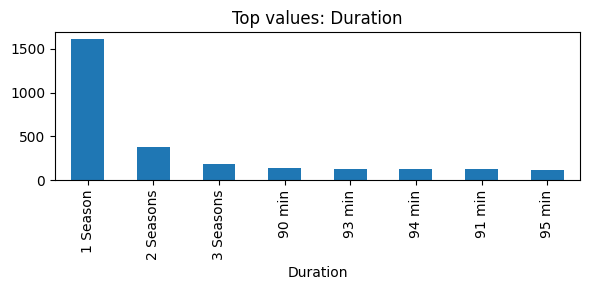

C:\Users\Tushar\AppData\Local\Temp\ipykernel_16868\3670456628.py:9: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


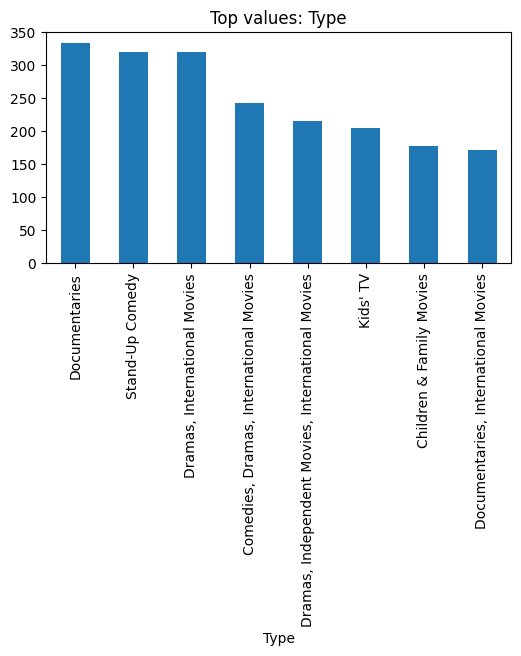

C:\Users\Tushar\AppData\Local\Temp\ipykernel_16868\3670456628.py:9: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


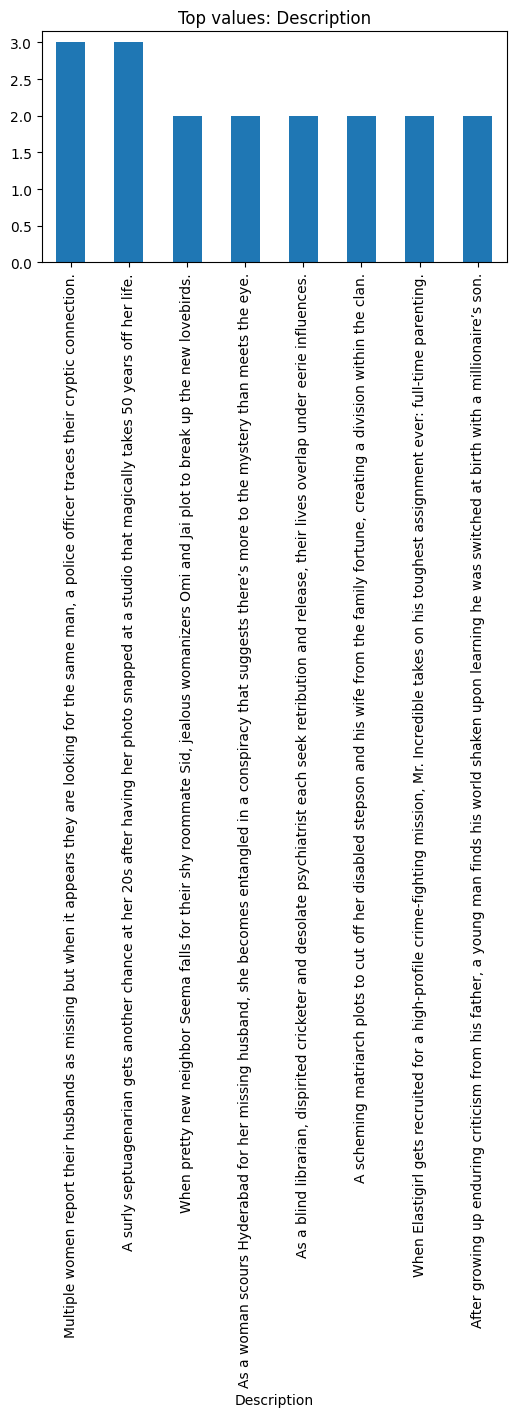

In [6]:

# Top categories for categorical columns (show top 8 categories)
cat_cols = df.select_dtypes(include=['object','category']).columns.tolist()
print("Categorical columns:", cat_cols)
for col in cat_cols:
    vc = df[col].value_counts(dropna=False).head(8)
    fig, ax = plt.subplots(figsize=(6,3))
    vc.plot.bar()
    ax.set_title(f"Top values: {col}")
    plt.tight_layout()
    plt.show()


In [7]:

# Correlation matrix for numeric columns
num_cols = df.select_dtypes(include=[np.number]).columns.tolist()
if len(num_cols) >= 2:
    corr = df[num_cols].corr()
    print("Correlation matrix (numeric columns):")
    display(corr)
    # heatmap
    fig, ax = plt.subplots(figsize=(min(12, 0.5*len(num_cols)), min(10, 0.5*len(num_cols))))
    cax = ax.imshow(corr, interpolation='nearest', aspect='auto')
    ax.set_xticks(range(len(num_cols)))
    ax.set_xticklabels(num_cols, rotation=90)
    ax.set_yticks(range(len(num_cols)))
    ax.set_yticklabels(num_cols)
    fig.colorbar(cax)
    plt.title("Correlation heatmap")
    plt.tight_layout()
    plt.show()
else:
    print("Not enough numeric columns for correlation matrix.")


Not enough numeric columns for correlation matrix.


In [8]:

# Automatic target detection
import re
candidates = []
target_names = ['target','label','y','outcome','price','saleprice','SalePrice','target_variable','response']
for name in df.columns:
    lname = name.lower()
    if lname in target_names:
        candidates.append(name)
# Also consider numeric columns with low missingness and plausible target-like names
if not candidates:
    for name in df.columns:
        lname = name.lower()
        if re.search(r'(^y$|_y$|target|label|price|sale)', lname):
            candidates.append(name)
# If still not found, pick numeric column with fewest missing values and highest variance (not guaranteed)
if not candidates:
    num_cols = df.select_dtypes(include=[np.number]).columns.tolist()
    if len(num_cols)>0:
        stats = df[num_cols].agg(['count','nunique','std']).T
        stats['missing'] = len(df) - stats['count']
        stats = stats.sort_values(['missing','std'], ascending=[True,False])
        if not stats.empty:
            candidates.append(stats.index[0])

if candidates:
    print("Detected target candidates (will try first):", candidates)
    target = candidates[0]
    print("Using target column:", target)
    # Prepare X, y
    y = df[target]
    X = df.drop(columns=[target])
    # Simple preprocessing: numeric fill, categorical encode with get_dummies
    X_proc = X.copy()
    num_cols = X_proc.select_dtypes(include=[np.number]).columns.tolist()
    cat_cols = X_proc.select_dtypes(include=['object','category']).columns.tolist()
    for c in num_cols:
        X_proc[c] = X_proc[c].fillna(X_proc[c].median())
    X_proc = pd.get_dummies(X_proc, columns=cat_cols, dummy_na=True)
    # Align sizes
    X_proc = X_proc.fillna(0)
    # Detect task type
    from sklearn.model_selection import cross_val_score, KFold
    from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
    from sklearn.linear_model import LinearRegression, LogisticRegression
    from sklearn.metrics import make_scorer, r2_score, accuracy_score

    is_regression = pd.api.types.is_numeric_dtype(y)
    print("Detected task type:", "regression" if is_regression else "classification")
    # Drop rows with missing y
    mask = y.notnull()
    X_train = X_proc.loc[mask]
    y_train = y.loc[mask]
    if len(y_train) < 10:
        print("Not enough non-missing target rows for modeling:", len(y_train))
    else:
        cv = KFold(n_splits=min(5, max(2, len(y_train)//10)), shuffle=True, random_state=42)
        if is_regression:
            print("Training simple regression baselines (LinearRegression, RandomForestRegressor)")
            lr = LinearRegression()
            rfr = RandomForestRegressor(n_estimators=100, random_state=42)
            scores_lr = cross_val_score(lr, X_train, y_train, cv=cv, scoring='r2')
            scores_rfr = cross_val_score(rfr, X_train, y_train, cv=cv, scoring='r2')
            print("LinearRegression R2 scores:", scores_lr, "mean:", scores_lr.mean())
            print("RandomForestRegressor R2 scores:", scores_rfr, "mean:", scores_rfr.mean())
        else:
            # classification - convert y to categorical codes if not numeric labels
            from sklearn.preprocessing import LabelEncoder
            le = LabelEncoder()
            y_enc = le.fit_transform(y_train.astype(str))
            print("Classes:", list(le.classes_))
            clf = RandomForestClassifier(n_estimators=100, random_state=42)
            scores_clf = cross_val_score(clf, X_train, y_enc, cv=cv, scoring='accuracy')
            print("RandomForestClassifier accuracy scores:", scores_clf, "mean:", scores_clf.mean())
else:
    print("No target candidate detected; skipping automated modeling. You can still run modeling by selecting a target column in the notebook.")


No target candidate detected; skipping automated modeling. You can still run modeling by selecting a target column in the notebook.
